# ANME Gene Content Analysis

In [2]:
library(data.table)
library(dplyr)
library(ggplot2)
library(stringr)
source("setup_gene_cov.R")

retentate_nano_gff %>% setnames(., old="##sequence-region contig_26_pilon 1 3312693", new="chrom")
filtrate_nano_gff %>% setnames(., old="##sequence-region unbinned_11 1 4200", new="chrom")

retn_vcf %>% setnames(., old="#CHROM", new="CHROM")
filt_vcf %>% setnames(., old="#CHROM", new="CHROM")

retn_vcf_rev %>% setnames(., old="#CHROM", new="CHROM")
filt_vcf_rev %>% setnames(., old="#CHROM", new="CHROM")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message in fread("/work/microbiome/abisko/rhys/01-projects/02-anme/03-genomes/prokka_out/retentate_anme_nanopore_redo.gff", :
“Detected 1 column names but the data has 9 columns (i.e. invalid file). Added 8 extra default column names at the end.”Warning message in fread("/work/microbiome/abisko/rhys/01-projects/02-anme/03-genomes/prokka_out/retentate_anme_nanopore_redo.gff", :
“Stopped early on line 3598. Expected 9 fields but found 1. Consider fill=TRUE and comment.char=. First discarded non-empty line: <<##FASTA>>”Warning message in fread("/work/microbiome/ab

In [24]:
## Variable ##
# retentate_nano
# filtrate_nano
# retentate_nano_gff
# filtrate_nano_gff
# retentate_illumina
# filtrate_illumina
# fausi_illumina

retn_vcf_rev[, length:=ifelse(is.na(str_match(INFO, "SVLEN=\\s*(.*?)\\s*")[, 2]),
                             0, str_match(INFO, "SVLEN=\\s*(.*?)\\s*d")[, 2])]
filt_vcf_rev[, length:=ifelse(is.na(str_match(INFO, "SVLEN=\\s*(.*?)\\s")[, 2]),
                             0, str_match(INFO, "SVLEN=\\s*(.*?)\\s*")[, 2])]
nrow(retn_vcf_rev)
nrow(filt_vcf_rev)
nrow(retn_vcf)
nrow(filt_vcf)

[1] 113

[1] 201

[1] 106

[1] 282

In [18]:
### Alter column 9 in gff files
## regexpr is hell land for the devil
retentate_nano_gff[, gene:=ifelse(is.na(str_match(V9, "Name=\\s*(.*?)\\s*;")[,2]), 
                                 "hypothetical", str_match(V9, "Name=\\s*(.*?)\\s*;")[,2])]
retentate_nano_gff[gene %like% "smc"]
filtrate_nano_gff[, gene:=ifelse(is.na(str_match(V9, "Name=\\s*(.*?)\\s*;")[,2]), 
                                 "hypothetical", str_match(V9, "Name=\\s*(.*?)\\s*;")[,2])]
filtrate_nano_gff[gene %like% "smc"]

chrom           V2              V3  V4      V5      V6 V7 V8
1 contig_26_pilon Prodigal:002006 CDS  122556  123569 .  +  0 
2 contig_26_pilon Prodigal:002006 CDS 1656552 1660061 .  +  0 
3 contig_26_pilon Prodigal:002006 CDS 2536958 2540491 .  -  0 
  V9                                                                                                                                                                                                                  
1 ID=MPGJHKPH_00143;Name=smc_1;gene=smc_1;inference=ab initio prediction:Prodigal:002006,protein motif:HAMAP:MF_01894;locus_tag=MPGJHKPH_00143;product=Chromosome partition protein Smc                               
2 ID=MPGJHKPH_01762;Name=smc_2;db_xref=COG:COG1196;gene=smc_2;inference=ab initio prediction:Prodigal:002006,similar to AA sequence:UniProtKB:Q8TZY2;locus_tag=MPGJHKPH_01762;product=Chromosome partition protein Smc
3 ID=MPGJHKPH_02704;Name=smc_3;gene=smc_3;inference=ab initio prediction:Prodigal:002006,protein motif:HAMAP:MF_01894;locus_tag=MPGJHKPH_02704;product=Chromosome partition protein Smc                               
  row_id gene 
1  143   smc_1
2 1762   smc_2
3 2710   smc_3

chrom            V2              V3  V4      V5      V6 V7 V8
1 contig_179_pilon Prodigal:002006 CDS  497534  501043 .  +  0 
2 contig_179_pilon Prodigal:002006 CDS 1374593 1378126 .  -  0 
3 contig_179_pilon Prodigal:002006 CDS 1477197 1479974 .  +  0 
4 contig_179_pilon Prodigal:002006 CDS 2235739 2236752 .  +  0 
  V9                                                                                                                                                                                                                  
1 ID=JAGLFHBA_00598;Name=smc_1;db_xref=COG:COG1196;gene=smc_1;inference=ab initio prediction:Prodigal:002006,similar to AA sequence:UniProtKB:Q8TZY2;locus_tag=JAGLFHBA_00598;product=Chromosome partition protein Smc
2 ID=JAGLFHBA_01552;Name=smc_2;gene=smc_2;inference=ab initio prediction:Prodigal:002006,protein motif:HAMAP:MF_01894;locus_tag=JAGLFHBA_01552;product=Chromosome partition protein Smc                               
3 ID=JAGLFHBA_01658;Name=smc_3;gene=smc_3;inference=ab initio prediction:Prodigal:002006,protein motif:HAMAP:MF_01894;locus_tag=JAGLFHBA_01658;product=Chromosome partition protein Smc                               
4 ID=JAGLFHBA_02530;Name=smc_4;gene=smc_4;inference=ab initio prediction:Prodigal:002006,protein motif:HAMAP:MF_01894;locus_tag=JAGLFHBA_02530;product=Chromosome partition protein Smc                               
  gene 
1 smc_1
2 smc_2
3 smc_3
4 smc_4

In [14]:
nrow(filt_vcf[CHROM == 'contig_179_pilon'])

[1] 250

## Variants within genes

#### Fraction matching fraction reads

In [19]:
### Find SNPs and variants within gene regions for Retentate
find.gene.variants <- function(chrom, start, end, variants) {
    variants[CHROM==chrom & ((POS >= start & POS <= end)), ]
}
retentate_nano_gff[, row_id:=seq_len(nrow(retentate_nano_gff))]

retentate_variants_in_genes <- retentate_nano_gff[, find.gene.variants(chrom, V4, V5, retn_vcf), by=seq_len(nrow(retentate_nano_gff))]
retentate_genes_with_variants <- retentate_nano_gff[gene != "hypothetical" & row_id %in% retentate_variants_in_genes$seq_len]

filtrate_nano_gff[, row_id:=seq_len(nrow(filtrate_nano_gff))]

filtrate_variants_in_genes <- filtrate_nano_gff[, 
                                      find.gene.variants(chrom, V4, V5, filt_vcf), 
                                                by=seq_len(nrow(filtrate_nano_gff))]
filtrate_genes_with_variants <- filtrate_nano_gff[gene != "hypothetical" & row_id %in% filtrate_variants_in_genes$seq_len]

In [9]:
retentate_nano_gff[V3 %like% "RNA" & row_id %in% retentate_variants_in_genes$seq_len]
filtrate_nano_gff[V3 %like% "RNA" & row_id %in% filtrate_variants_in_genes$seq_len]

chrom V2 V3 V4 V5 V6 V7 V8 V9 gene row_id

chrom V2 V3 V4 V5 V6 V7 V8 V9 gene row_id

In [22]:
## All genes with variants in them between the two fractions

filtrate_genes_with_variants[gene %like% "smc"]
inner_join(filtrate_variants_in_genes, filtrate_genes_with_variants, by=c("seq_len" = "row_id"))
inner_join(retentate_variants_in_genes, retentate_genes_with_variants, by=c("seq_len" = "row_id"))

chrom V2 V3 V4 V5 V6 V7 V8 V9 gene row_id

seq_len CHROM             POS     ID
1     1    contig_1266_pilon    1192 . 
2   157    contig_179_pilon    90066 . 
3   342    contig_179_pilon   251253 . 
4   408    contig_179_pilon   320251 . 
5   452    contig_179_pilon   363229 . 
6  1335    contig_179_pilon  1167673 . 
7  1335    contig_179_pilon  1167986 . 
8  1343    contig_179_pilon  1178684 . 
9  1348    contig_179_pilon  1185176 . 
10 1366    contig_179_pilon  1205201 . 
11 1739    contig_179_pilon  1549530 . 
12 1884    contig_179_pilon  1667889 . 
13 1884    contig_179_pilon  1668173 . 
14 1884    contig_179_pilon  1667648 . 
15 1969    contig_179_pilon  1739854 . 
16 2147    contig_179_pilon  1890377 . 
17 2171    contig_179_pilon  1907551 . 
18 2184    contig_179_pilon  1917423 . 
19 2301    contig_179_pilon  2028513 . 
20 2302    contig_179_pilon  2028513 . 
21 2663    contig_179_pilon  2344345 . 
22 2753    contig_179_pilon  2425927 . 
23 3178    contig_179_pilon  2840361 . 
24 3287    contig_179_pilon  2956246 . 
25 3287    contig_179_pilon  2956238 . 
26 3287    contig_179_pilon  2956286 . 
27 3287    contig_179_pilon  2956295 . 
28 3293    contig_179_pilon  2962566 . 
29 3296    contig_179_pilon  2965385 . 
30 3531    contig_179_pilon  3187404 . 
31 3532    contig_179_pilon  3187404 . 
   REF                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
1  CGTAAGAGCCTATCCGAAAAGTAGAAGAATTACAATGTAGGGTAATGTGGGGTAATGACAACACGAAAAATCGGACACGATTACGAAATAGCTGATGAATTATGGAAGAAAATAGAACCACTGCTACCACCACCAAAGCCAAAGAAGAAGTCTGGAAGACCGAGAAAGGATGATAGGAAAATGATGACTGCTATTTTTATATACTTCGCACAGGCTGCCAGTGGAAGGCATTGCCGAGATCATTAGGTGCTTCAAGCACTGTACATGATAGATTTCAGGAGTGGAGAGAGGCTGGATTATTTGAGAAAATGTGGAAAGCAGGTTTGATAGAATATGATATAAAGAAAGGAATAGATTGGGAATGGCAATCAATGGATGGAGCAATGACAAAAGCACCTCTGGGTGGAGAGGGAACAGGAGCAAATCCAACAGATAGAGGCAAGAAGGGTACAAAAAGAAGTTTACTGACAGAAGGGAACGGGATACCACTTTCAGTTGCTGTGGATGGAGCTAACCGTCATGATAAAAAGCTTGTAAAAGGGACTCTTGATGCCGTAATCATAGAGAGACCTTCTCCTGATAACGTAGATCAGAATATGTGCATGGATAAGGGATATGATTTTCCTGATATCAGAGAACTGGTAGAAGAATACGGTTATACCGCACATATCCGAAGCCGTGGAGAAGAAAACAATGAAAAAAAAGATACCAGGTTATAGAGCAAGGAGATGGGTAGTGGAAAGGACACACTCATGGCTGAATCGGTTCAGGAGACTACGGATCTGATGGGAGTAAAAGCGTGATAACTCTCTTGCATTGTTACACTTCGCATGTGCATGGATAACGTTCAGAGCTTCTGGACTTTTCGGATAGGCT
2  AAGC                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
3  TA                                                                              

seq_len CHROM           POS     ID
1    31    contig_26_pilon   19445 . 
2    31    contig_26_pilon   19450 . 
3    31    contig_26_pilon   19462 . 
4   626    contig_26_pilon  591148 . 
5   626    contig_26_pilon  591796 . 
6   626    contig_26_pilon  591584 . 
7   626    contig_26_pilon  591551 . 
8   626    contig_26_pilon  591611 . 
9   626    contig_26_pilon  591413 . 
10  626    contig_26_pilon  591406 . 
11  626    contig_26_pilon  591212 . 
12  626    contig_26_pilon  591335 . 
13  626    contig_26_pilon  591309 . 
14  626    contig_26_pilon  591085 . 
15  626    contig_26_pilon  591226 . 
16  626    contig_26_pilon  591022 . 
17  627    contig_26_pilon  592927 . 
18  627    contig_26_pilon  592456 . 
19  627    contig_26_pilon  592529 . 
20  627    contig_26_pilon  592420 . 
21  627    contig_26_pilon  592732 . 
22  627    contig_26_pilon  591961 . 
23  627    contig_26_pilon  592916 . 
24  627    contig_26_pilon  591921 . 
25  627    contig_26_pilon  592378 . 
26  627    contig_26_pilon  593053 . 
27  627    contig_26_pilon  592273 . 
28  627    contig_26_pilon  592882 . 
29  627    contig_26_pilon  592972 . 
30  627    contig_26_pilon  592147 . 
31  627    contig_26_pilon  592843 . 
32  627    contig_26_pilon  591955 . 
33  627    contig_26_pilon  593005 . 
34  627    contig_26_pilon  592288 . 
35  627    contig_26_pilon  592480 . 
36  627    contig_26_pilon  592231 . 
37  627    contig_26_pilon  593122 . 
38  627    contig_26_pilon  592415 . 
39  627    contig_26_pilon  592962 . 
40  627    contig_26_pilon  592990 . 
41  627    contig_26_pilon  591883 . 
42  627    contig_26_pilon  593152 . 
43  627    contig_26_pilon  591973 . 
44  627    contig_26_pilon  592216 . 
45  627    contig_26_pilon  592894 . 
46  627    contig_26_pilon  593101 . 
47  627    contig_26_pilon  593092 . 
48  627    contig_26_pilon  592407 . 
49  627    contig_26_pilon  592954 . 
50  885    contig_26_pilon  840727 . 
51  885    contig_26_pilon  840775 . 
52  885    contig_26_pilon  840784 . 
53  885    contig_26_pilon  840735 . 
54 1439    contig_26_pilon 1352549 . 
55 2690    contig_26_pilon 2515104 . 
56 2917    contig_26_pilon 2736118 . 
57 3033    contig_26_pilon 2830006 . 
58 3087    contig_26_pilon 2878624 . 
59 3180    contig_26_pilon 2949153 . 
   REF                                                 
1  T                                                   
2  G                                                   
3  C                                                   
4  C                                                   
5  AGAAGATATTAAATAGTTAGCAACCTATCGAACAATATAATCTATATAAACA
6  TCGGATGAATCTGGGTA                                   
7  CG                                                  
8  G                                                   
9  T                                                   
10 A                                                   
11 A                                                   
12 A                                                   
13 GTAGGA                                              
14 CA                                                  
15 T                                                   
16 T                                                   
17 TCGT                                                
18 A                                                   
19 G                                                   
20 C                                                   
21 AACTA                                               
22 CCCTA                                               
23 ATT                                                 
24 TCGATGCGTGT                                         
25 T                                                   
26 GCTGTCA                                             
27 GCAT                                                
28 TGTT                                                
29 TACATGC                                             
30 T                                       

#### Fraction does not match fraction reads

In [121]:
retentate_variants_in_genes_rev <- retentate_nano_gff[, find.gene.variants(chrom, V4, V5, retn_vcf_rev), by=seq_len(nrow(retentate_nano_gff))]
retentate_genes_with_variants_rev <- retentate_nano_gff[gene != "hypothetical" & row_id %in% retentate_variants_in_genes_rev$seq_len]


filtrate_variants_in_genes_rev <- filtrate_nano_gff[, 
                                      find.gene.variants(chrom, V4, V5, filt_vcf_rev), 
                                                by=seq_len(nrow(filtrate_nano_gff))]
filtrate_genes_with_variants_rev <- filtrate_nano_gff[gene != "hypothetical" & 
                                                      row_id %in% filtrate_variants_in_genes_rev$seq_len]


In [124]:
retentate_genes_with_variants_rev[gene %like% "smc"]
inner_join(retentate_variants_in_genes, retentate_genes_with_variants, by=c("seq_len" = "row_id"))
inner_join(retentate_variants_in_genes_rev, retentate_genes_with_variants_rev, by=c("seq_len" = "row_id"))

chrom V2 V3 V4 V5 V6 V7 V8 V9 gene row_id

seq_len CHROM           POS     ID
1    31    contig_26_pilon   19445 . 
2    31    contig_26_pilon   19450 . 
3    31    contig_26_pilon   19462 . 
4   626    contig_26_pilon  591148 . 
5   626    contig_26_pilon  591796 . 
6   626    contig_26_pilon  591584 . 
7   626    contig_26_pilon  591551 . 
8   626    contig_26_pilon  591611 . 
9   626    contig_26_pilon  591413 . 
10  626    contig_26_pilon  591406 . 
11  626    contig_26_pilon  591212 . 
12  626    contig_26_pilon  591335 . 
13  626    contig_26_pilon  591309 . 
14  626    contig_26_pilon  591085 . 
15  626    contig_26_pilon  591226 . 
16  626    contig_26_pilon  591022 . 
17  627    contig_26_pilon  592927 . 
18  627    contig_26_pilon  592456 . 
19  627    contig_26_pilon  592529 . 
20  627    contig_26_pilon  592420 . 
21  627    contig_26_pilon  592732 . 
22  627    contig_26_pilon  591961 . 
23  627    contig_26_pilon  592916 . 
24  627    contig_26_pilon  591921 . 
25  627    contig_26_pilon  592378 . 
26  627    contig_26_pilon  593053 . 
27  627    contig_26_pilon  592273 . 
28  627    contig_26_pilon  592882 . 
29  627    contig_26_pilon  592972 . 
30  627    contig_26_pilon  592147 . 
31  627    contig_26_pilon  592843 . 
32  627    contig_26_pilon  591955 . 
33  627    contig_26_pilon  593005 . 
34  627    contig_26_pilon  592288 . 
35  627    contig_26_pilon  592480 . 
36  627    contig_26_pilon  592231 . 
37  627    contig_26_pilon  593122 . 
38  627    contig_26_pilon  592415 . 
39  627    contig_26_pilon  592962 . 
40  627    contig_26_pilon  592990 . 
41  627    contig_26_pilon  591883 . 
42  627    contig_26_pilon  593152 . 
43  627    contig_26_pilon  591973 . 
44  627    contig_26_pilon  592216 . 
45  627    contig_26_pilon  592894 . 
46  627    contig_26_pilon  593101 . 
47  627    contig_26_pilon  593092 . 
48  627    contig_26_pilon  592407 . 
49  627    contig_26_pilon  592954 . 
50  885    contig_26_pilon  840727 . 
51  885    contig_26_pilon  840775 . 
52  885    contig_26_pilon  840784 . 
53  885    contig_26_pilon  840735 . 
54 1439    contig_26_pilon 1352549 . 
55 2690    contig_26_pilon 2515104 . 
56 2917    contig_26_pilon 2736118 . 
57 3033    contig_26_pilon 2830006 . 
58 3087    contig_26_pilon 2878624 . 
59 3180    contig_26_pilon 2949153 . 
   REF                                                 
1  T                                                   
2  G                                                   
3  C                                                   
4  C                                                   
5  AGAAGATATTAAATAGTTAGCAACCTATCGAACAATATAATCTATATAAACA
6  TCGGATGAATCTGGGTA                                   
7  CG                                                  
8  G                                                   
9  T                                                   
10 A                                                   
11 A                                                   
12 A                                                   
13 GTAGGA                                              
14 CA                                                  
15 T                                                   
16 T                                                   
17 TCGT                                                
18 A                                                   
19 G                                                   
20 C                                                   
21 AACTA                                               
22 CCCTA                                               
23 ATT                                                 
24 TCGATGCGTGT                                         
25 T                                                   
26 GCTGTCA                                             
27 GCAT                                                
28 TGTT                                                
29 TACATGC                                             
30 T                                       

seq_len CHROM           POS     ID
1    31    contig_26_pilon   19476 . 
2   626    contig_26_pilon  591148 . 
3   626    contig_26_pilon  591551 . 
4   626    contig_26_pilon  591335 . 
5   626    contig_26_pilon  591212 . 
6   626    contig_26_pilon  591406 . 
7   626    contig_26_pilon  591309 . 
8   626    contig_26_pilon  591797 . 
9   626    contig_26_pilon  591022 . 
10  626    contig_26_pilon  591413 . 
11  626    contig_26_pilon  591226 . 
12  626    contig_26_pilon  591085 . 
13  627    contig_26_pilon  592894 . 
14  627    contig_26_pilon  593122 . 
15  627    contig_26_pilon  592962 . 
16  627    contig_26_pilon  592378 . 
17  627    contig_26_pilon  592407 . 
18  627    contig_26_pilon  592216 . 
19  627    contig_26_pilon  591921 . 
20  627    contig_26_pilon  592231 . 
21  627    contig_26_pilon  592480 . 
22  627    contig_26_pilon  592456 . 
23  627    contig_26_pilon  592954 . 
24  627    contig_26_pilon  592415 . 
25  627    contig_26_pilon  591955 . 
26  627    contig_26_pilon  592843 . 
27  627    contig_26_pilon  592147 . 
28  627    contig_26_pilon  591973 . 
29  627    contig_26_pilon  592990 . 
30  627    contig_26_pilon  593005 . 
31  627    contig_26_pilon  593152 . 
32  627    contig_26_pilon  592732 . 
33  627    contig_26_pilon  592288 . 
34  627    contig_26_pilon  592273 . 
35  627    contig_26_pilon  591883 . 
36  627    contig_26_pilon  591961 . 
37  627    contig_26_pilon  592882 . 
38  627    contig_26_pilon  592529 . 
39  627    contig_26_pilon  592972 . 
40  627    contig_26_pilon  592927 . 
41  627    contig_26_pilon  592916 . 
42  627    contig_26_pilon  593101 . 
43  627    contig_26_pilon  593092 . 
44  627    contig_26_pilon  593053 . 
45  627    contig_26_pilon  592420 . 
46  885    contig_26_pilon  840735 . 
47  885    contig_26_pilon  840784 . 
48  885    contig_26_pilon  840775 . 
49  885    contig_26_pilon  840727 . 
50 1439    contig_26_pilon 1352549 . 
51 2690    contig_26_pilon 2515104 . 
52 2917    contig_26_pilon 2736118 . 
53 3033    contig_26_pilon 2830531 . 
54 3033    contig_26_pilon 2830247 . 
55 3033    contig_26_pilon 2830006 . 
56 3087    contig_26_pilon 2878624 . 
57 3318    contig_26_pilon 3069911 . 
   REF                                                 ALT                   
1  G                                                   C                     
2  C                                                   T                     
3  CG                                                  CGAA                  
4  A                                                   G                     
5  A                                                   C                     
6  A                                                   G                     
7  GTAGGA                                              GTAGGAATGGGG          
8  GAAGATATTAAATAGTTAGCAACCTATCGAACAATATAATCTATATAAACA GN                    
9  T                                                   C                     
10 T                                                   A                     
11 T                                                   C                     
12 CA                                                  CATC                  
13 A                                                   T                     
14 A                                                   G                     
15 T                                                   C                     
16 T                                                   A                     
17 G                                                   A                     
18 A                                                   G                     
19 TCGATGCGTGT                                         TCGATGCGTGTACGACGCATGC
20 GTATGGAAAA                                          GTATGGAAAAATACGGCAAG  
21 G                                                   A                     
22 A                                                   T                     
23 AG

In [123]:
inner_join(filtrate_variants_in_genes, filtrate_genes_with_variants, by=c("seq_len" = "row_id"))
inner_join(filtrate_variants_in_genes_rev, filtrate_genes_with_variants_rev, by=c("seq_len" = "row_id"))

seq_len CHROM             POS     ID
1     1    contig_1266_pilon    1192 . 
2   157    contig_179_pilon    90066 . 
3   342    contig_179_pilon   251253 . 
4   408    contig_179_pilon   320251 . 
5   452    contig_179_pilon   363229 . 
6  1335    contig_179_pilon  1167673 . 
7  1335    contig_179_pilon  1167986 . 
8  1343    contig_179_pilon  1178684 . 
9  1348    contig_179_pilon  1185176 . 
10 1366    contig_179_pilon  1205201 . 
11 1739    contig_179_pilon  1549530 . 
12 1884    contig_179_pilon  1667889 . 
13 1884    contig_179_pilon  1668173 . 
14 1884    contig_179_pilon  1667648 . 
15 1969    contig_179_pilon  1739854 . 
16 2147    contig_179_pilon  1890377 . 
17 2171    contig_179_pilon  1907551 . 
18 2184    contig_179_pilon  1917423 . 
19 2301    contig_179_pilon  2028513 . 
20 2302    contig_179_pilon  2028513 . 
21 2663    contig_179_pilon  2344345 . 
22 2753    contig_179_pilon  2425927 . 
23 3178    contig_179_pilon  2840361 . 
24 3287    contig_179_pilon  2956246 . 
25 3287    contig_179_pilon  2956238 . 
26 3287    contig_179_pilon  2956286 . 
27 3287    contig_179_pilon  2956295 . 
28 3293    contig_179_pilon  2962566 . 
29 3296    contig_179_pilon  2965385 . 
30 3531    contig_179_pilon  3187404 . 
31 3532    contig_179_pilon  3187404 . 
   REF                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
1  CGTAAGAGCCTATCCGAAAAGTAGAAGAATTACAATGTAGGGTAATGTGGGGTAATGACAACACGAAAAATCGGACACGATTACGAAATAGCTGATGAATTATGGAAGAAAATAGAACCACTGCTACCACCACCAAAGCCAAAGAAGAAGTCTGGAAGACCGAGAAAGGATGATAGGAAAATGATGACTGCTATTTTTATATACTTCGCACAGGCTGCCAGTGGAAGGCATTGCCGAGATCATTAGGTGCTTCAAGCACTGTACATGATAGATTTCAGGAGTGGAGAGAGGCTGGATTATTTGAGAAAATGTGGAAAGCAGGTTTGATAGAATATGATATAAAGAAAGGAATAGATTGGGAATGGCAATCAATGGATGGAGCAATGACAAAAGCACCTCTGGGTGGAGAGGGAACAGGAGCAAATCCAACAGATAGAGGCAAGAAGGGTACAAAAAGAAGTTTACTGACAGAAGGGAACGGGATACCACTTTCAGTTGCTGTGGATGGAGCTAACCGTCATGATAAAAAGCTTGTAAAAGGGACTCTTGATGCCGTAATCATAGAGAGACCTTCTCCTGATAACGTAGATCAGAATATGTGCATGGATAAGGGATATGATTTTCCTGATATCAGAGAACTGGTAGAAGAATACGGTTATACCGCACATATCCGAAGCCGTGGAGAAGAAAACAATGAAAAAAAAGATACCAGGTTATAGAGCAAGGAGATGGGTAGTGGAAAGGACACACTCATGGCTGAATCGGTTCAGGAGACTACGGATCTGATGGGAGTAAAAGCGTGATAACTCTCTTGCATTGTTACACTTCGCATGTGCATGGATAACGTTCAGAGCTTCTGGACTTTTCGGATAGGCT
2  AAGC                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
3  TA                                                                              

seq_len CHROM             POS     ID
1     1    contig_1266_pilon    1193 . 
2   157    contig_179_pilon    90066 . 
3   342    contig_179_pilon   251253 . 
4   408    contig_179_pilon   320247 . 
5   452    contig_179_pilon   363229 . 
6  1335    contig_179_pilon  1167986 . 
7  1335    contig_179_pilon  1167673 . 
8  1335    contig_179_pilon  1167673 . 
9  1343    contig_179_pilon  1178684 . 
10 1348    contig_179_pilon  1185176 . 
11 1366    contig_179_pilon  1205201 . 
12 1739    contig_179_pilon  1549530 . 
13 1884    contig_179_pilon  1667648 . 
14 1969    contig_179_pilon  1739854 . 
15 2033    contig_179_pilon  1786793 . 
16 2147    contig_179_pilon  1890377 . 
17 2171    contig_179_pilon  1907551 . 
18 2184    contig_179_pilon  1917423 . 
19 2301    contig_179_pilon  2028513 . 
20 2302    contig_179_pilon  2028513 . 
21 2663    contig_179_pilon  2344345 . 
22 2753    contig_179_pilon  2425927 . 
23 3178    contig_179_pilon  2840361 . 
24 3287    contig_179_pilon  2956246 . 
25 3287    contig_179_pilon  2956295 . 
26 3287    contig_179_pilon  2956286 . 
27 3287    contig_179_pilon  2956238 . 
28 3296    contig_179_pilon  2965385 . 
29 3531    contig_179_pilon  3187404 . 
30 3532    contig_179_pilon  3187404 . 
   REF                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
1  GTAAGAGCCTATCCGAAAAGTAGAAGAATTACAATGTAGGGTAATGTGGGGTAATGACAACACGAAAAATCGGACACGATTACGAAATAGCTGATGAATTATGGAAGAAAATAGAACCACTGCTACCACCACCAAAGCCAAAGAAGAAGTCTGGAAGACCGAGAAAGGATGATAGGAAAATGATGACTGCTATTTTTATATACTTCGCACAGGCTGCCAGTGGAAGGCATTGCCGAGATCATTAGGTGCTTCAAGCACTGTACATGATAGATTTCAGGAGTGGAGAGAGGCTGGATTATTTGAGAAAATGTGGAAAGCAGGTTTGATAGAATATGATATAAAGAAAGGAATAGATTGGGAATGGCAATCAATGGATGGAGCAATGACAAAAGCACCTCTGGGTGGAGAGGGAACAGGAGCAAATCCAACAGATAGAGGCAAGAAGGGTACAAAAAGAAGTTTACTGACAGAAGGGAACGGGATACCACTTTCAGTTGCTGTGGATGGAGCTAACCGTCATGATAAAAAGCTTGTAAAAGGGACTCTTGATGCCGTAATCATAGAGAGACCTTCTCCTGATAACGTAGATCAGAATATGTGCATGGATAAGGGATATGATTTTCCTGATATCAGAGAACTGGTAGAAGAATACGGTTATACCGCACATATCCGAAGCCGTGGAGAAGAAAACAATGAAAAAAAAGATACCAGGTTATAGAGCAAGGAGATGGGTAGTGGAAAGGACACACTCATGGCTGAATCGGTTCAGGAGACTACGGATCTGATGGGAGTAAAAGCGTGATAACTCTCTTGCATTGTTACACTTCGCATGTGCATGGATAACGTTCAGAGCTTCTGGACTTTTCGGATAGGCTC
2  AAGC                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
3  TA                                                                                                                      

In [76]:
### Pull out info about cheY
retentate_nano[gene %like% 'che', ]
filtrate_nano[gene %like% 'che', ]

retentate_illumina[gene %like% 'che', ]
filtrate_illumina[gene %like% 'che', ]
fausi_illumina[gene %like% 'che', ]

locus_tag      ftype length_bp gene   EC_number COG
1  MPGJHKPH_01079 CDS    378      cheY_1              
2  MPGJHKPH_01946 CDS    570      cheB_1 3.1.1.61     
3  MPGJHKPH_02751 CDS    366      cheY_2              
4  MPGJHKPH_02928 CDS    417      cheY_3              
5  MPGJHKPH_03320 CDS    474      cheD   3.5.1.44     
6  MPGJHKPH_03322 CDS    840      cheR   2.1.1.80     
7  MPGJHKPH_03323 CDS   1932      cheA   2.7.13.3     
8  MPGJHKPH_03324 CDS   1065      cheB_2 3.1.1.61     
9  MPGJHKPH_03325 CDS    357      cheY_4              
10 MPGJHKPH_03333 CDS    633      cheB_3 3.5.1.44     
   product                                                       
1  Chemotaxis protein CheY                                       
2  Protein-glutamate methylesterase/protein-glutamine glutaminase
3  Chemotaxis protein CheY                                       
4  Chemotaxis protein CheY                                       
5  Chemoreceptor glutamine deamidase CheD                        
6  Chemotaxis protein methyltransferase                          
7  Chemotaxis protein CheA                                       
8  Protein-glutamate methylesterase/protein-glutamine glutaminase
9  Chemotaxis protein CheY                                       
10 Protein-glutamate methylesterase/protein-glutamine glutaminase

locus_tag      ftype length_bp gene   EC_number COG
1  JAGLFHBA_00784 CDS    570      cheB_1 3.1.1.61     
2  JAGLFHBA_01599 CDS    366      cheY_1              
3  JAGLFHBA_01776 CDS    417      cheY_2              
4  JAGLFHBA_02172 CDS    474      cheD   3.5.1.44     
5  JAGLFHBA_02174 CDS    840      cheR   2.1.1.80     
6  JAGLFHBA_02175 CDS   1932      cheA   2.7.13.3     
7  JAGLFHBA_02176 CDS    339      cheB_2 3.1.1.61     
8  JAGLFHBA_02177 CDS    753      cheB_3 3.1.1.61     
9  JAGLFHBA_02178 CDS    357      cheY_3              
10 JAGLFHBA_02186 CDS    633      cheB_4 3.5.1.44     
11 JAGLFHBA_03479 CDS    378      cheY_4              
   product                                                       
1  Protein-glutamate methylesterase/protein-glutamine glutaminase
2  Chemotaxis protein CheY                                       
3  Chemotaxis protein CheY                                       
4  Chemoreceptor glutamine deamidase CheD                        
5  Chemotaxis protein methyltransferase                          
6  Chemotaxis protein CheA                                       
7  Protein-glutamate methylesterase/protein-glutamine glutaminase
8  Protein-glutamate methylesterase/protein-glutamine glutaminase
9  Chemotaxis protein CheY                                       
10 Protein-glutamate methylesterase/protein-glutamine glutaminase
11 Chemotaxis protein CheY

locus_tag      ftype length_bp gene   EC_number COG
1  GDJIJJAD_00241 CDS    417      cheY_1              
2  GDJIJJAD_02035 CDS    570      cheB_1 3.1.1.61     
3  GDJIJJAD_02075 CDS    474      cheD   3.5.1.44     
4  GDJIJJAD_02077 CDS    840      cheR   2.1.1.80     
5  GDJIJJAD_02078 CDS   1932      cheA   2.7.13.3     
6  GDJIJJAD_02079 CDS   1065      cheB_2 3.1.1.61     
7  GDJIJJAD_02080 CDS    357      cheY_2              
8  GDJIJJAD_02088 CDS    633      cheB_3 3.5.1.44     
9  GDJIJJAD_02255 CDS    378      cheY_3              
10 GDJIJJAD_02603 CDS    366      cheY_4              
   product                                                       
1  Chemotaxis protein CheY                                       
2  Protein-glutamate methylesterase/protein-glutamine glutaminase
3  Chemoreceptor glutamine deamidase CheD                        
4  Chemotaxis protein methyltransferase                          
5  Chemotaxis protein CheA                                       
6  Protein-glutamate methylesterase/protein-glutamine glutaminase
7  Chemotaxis protein CheY                                       
8  Protein-glutamate methylesterase/protein-glutamine glutaminase
9  Chemotaxis protein CheY                                       
10 Chemotaxis protein CheY

locus_tag      ftype length_bp gene   EC_number COG
1  PONNBGGF_00027 CDS    417      cheY_1              
2  PONNBGGF_02036 CDS    570      cheB_1 3.1.1.61     
3  PONNBGGF_02076 CDS    474      cheD   3.5.1.44     
4  PONNBGGF_02078 CDS    840      cheR   2.1.1.80     
5  PONNBGGF_02079 CDS   1932      cheA   2.7.13.3     
6  PONNBGGF_02080 CDS   1065      cheB_2 3.1.1.61     
7  PONNBGGF_02081 CDS    357      cheY_2              
8  PONNBGGF_02089 CDS    633      cheB_3 3.5.1.44     
9  PONNBGGF_02311 CDS    378      cheY_3              
10 PONNBGGF_02581 CDS    366      cheY_4              
   product                                                       
1  Chemotaxis protein CheY                                       
2  Protein-glutamate methylesterase/protein-glutamine glutaminase
3  Chemoreceptor glutamine deamidase CheD                        
4  Chemotaxis protein methyltransferase                          
5  Chemotaxis protein CheA                                       
6  Protein-glutamate methylesterase/protein-glutamine glutaminase
7  Chemotaxis protein CheY                                       
8  Protein-glutamate methylesterase/protein-glutamine glutaminase
9  Chemotaxis protein CheY                                       
10 Chemotaxis protein CheY

locus_tag      ftype length_bp gene   EC_number COG
1  LEIIEBME_00256 CDS    570      cheB_1 3.1.1.61     
2  LEIIEBME_00800 CDS    378      cheY_1              
3  LEIIEBME_01513 CDS    417      cheY_2              
4  LEIIEBME_01995 CDS    366      cheY_3              
5  LEIIEBME_03088 CDS    474      cheD   3.5.1.44     
6  LEIIEBME_03090 CDS    840      cheR   2.1.1.80     
7  LEIIEBME_03091 CDS   1932      cheA   2.7.13.3     
8  LEIIEBME_03092 CDS   1065      cheB_2 3.1.1.61     
9  LEIIEBME_03093 CDS    357      cheY_4              
10 LEIIEBME_03101 CDS    633      cheB_3 3.5.1.44     
   product                                                       
1  Protein-glutamate methylesterase/protein-glutamine glutaminase
2  Chemotaxis protein CheY                                       
3  Chemotaxis protein CheY                                       
4  Chemotaxis protein CheY                                       
5  Chemoreceptor glutamine deamidase CheD                        
6  Chemotaxis protein methyltransferase                          
7  Chemotaxis protein CheA                                       
8  Protein-glutamate methylesterase/protein-glutamine glutaminase
9  Chemotaxis protein CheY                                       
10 Protein-glutamate methylesterase/protein-glutamine glutaminase

In [77]:
### Pull out info about flagella genes
retentate_nano[gene %like% 'fla',]
filtrate_nano[gene %like% 'fla', ]

retentate_illumina[gene %like% 'fla', ]
filtrate_illumina[gene %like% 'fla', ]
fausi_illumina[gene %like% 'fla',]

locus_tag      ftype length_bp gene  EC_number COG    
1 MPGJHKPH_01622 CDS   747       flaK  3.4.23.52 COG1989
2 MPGJHKPH_03328 CDS   693       flaH            COG2874
3 MPGJHKPH_03331 CDS   630       flaB2                  
4 MPGJHKPH_03332 CDS   585       flaB1           COG1681
  product                            
1 Preflagellin peptidase             
2 Putative flagella-related protein H
3 Flagellin B2                       
4 Flagellin B1

locus_tag      ftype length_bp gene  EC_number COG    
1 JAGLFHBA_00457 CDS   747       flaK  3.4.23.52 COG1989
2 JAGLFHBA_02181 CDS   693       flaH            COG2874
3 JAGLFHBA_02184 CDS   630       flaB2                  
4 JAGLFHBA_02185 CDS   585       flaB1           COG1681
  product                            
1 Preflagellin peptidase             
2 Putative flagella-related protein H
3 Flagellin B2                       
4 Flagellin B1

locus_tag      ftype length_bp gene  EC_number COG    
1 GDJIJJAD_01280 CDS   747       flaK  3.4.23.52 COG1989
2 GDJIJJAD_02083 CDS   693       flaH            COG2874
3 GDJIJJAD_02086 CDS   630       flaB2                  
4 GDJIJJAD_02087 CDS   585       flaB1           COG1681
  product                            
1 Preflagellin peptidase             
2 Putative flagella-related protein H
3 Flagellin B2                       
4 Flagellin B1

locus_tag      ftype length_bp gene  EC_number COG    
1 PONNBGGF_01186 CDS   747       flaK  3.4.23.52 COG1989
2 PONNBGGF_02084 CDS   693       flaH            COG2874
3 PONNBGGF_02087 CDS   630       flaB2                  
4 PONNBGGF_02088 CDS   585       flaB1           COG1681
  product                            
1 Preflagellin peptidase             
2 Putative flagella-related protein H
3 Flagellin B2                       
4 Flagellin B1

locus_tag      ftype length_bp gene  EC_number COG    
1 LEIIEBME_01326 CDS   747       flaK  3.4.23.52 COG1989
2 LEIIEBME_03096 CDS   693       flaH            COG2874
3 LEIIEBME_03099 CDS   630       flaB2                  
4 LEIIEBME_03100 CDS   585       flaB1           COG1681
  product                            
1 Preflagellin peptidase             
2 Putative flagella-related protein H
3 Flagellin B2                       
4 Flagellin B1

In [108]:
### Pull out info about membrane genes
retentate_nano[gene %like% 'smc',]
filtrate_nano[gene %like% 'smc', ]
retentate_nano_gff[gene %like% 'smc',]
filtrate_nano_gff[gene %like% 'smc', ]
# retentate_illumina[gene %like% 'mre', ]
# filtrate_illumina[gene %like% 'mre', ]
# fausi_illumina[gene %like% 'mre',]

locus_tag      ftype length_bp gene  EC_number COG    
1 MPGJHKPH_00143 CDS   1014      smc_1                  
2 MPGJHKPH_01762 CDS   3510      smc_2           COG1196
3 MPGJHKPH_02704 CDS   3534      smc_3                  
  product                         
1 Chromosome partition protein Smc
2 Chromosome partition protein Smc
3 Chromosome partition protein Smc

locus_tag      ftype length_bp gene  EC_number COG    
1 JAGLFHBA_00598 CDS   3510      smc_1           COG1196
2 JAGLFHBA_01552 CDS   3534      smc_2                  
3 JAGLFHBA_01658 CDS   2778      smc_3                  
4 JAGLFHBA_02530 CDS   1014      smc_4                  
  product                         
1 Chromosome partition protein Smc
2 Chromosome partition protein Smc
3 Chromosome partition protein Smc
4 Chromosome partition protein Smc

chrom           V2              V3  V4      V5      V6 V7 V8
1 contig_26_pilon Prodigal:002006 CDS  122556  123569 .  +  0 
2 contig_26_pilon Prodigal:002006 CDS 1656552 1660061 .  +  0 
3 contig_26_pilon Prodigal:002006 CDS 2536958 2540491 .  -  0 
  V9                                                                                                                                                                                                                  
1 ID=MPGJHKPH_00143;Name=smc_1;gene=smc_1;inference=ab initio prediction:Prodigal:002006,protein motif:HAMAP:MF_01894;locus_tag=MPGJHKPH_00143;product=Chromosome partition protein Smc                               
2 ID=MPGJHKPH_01762;Name=smc_2;db_xref=COG:COG1196;gene=smc_2;inference=ab initio prediction:Prodigal:002006,similar to AA sequence:UniProtKB:Q8TZY2;locus_tag=MPGJHKPH_01762;product=Chromosome partition protein Smc
3 ID=MPGJHKPH_02704;Name=smc_3;gene=smc_3;inference=ab initio prediction:Prodigal:002006,protein motif:HAMAP:MF_01894;locus_tag=MPGJHKPH_02704;product=Chromosome partition protein Smc                               
  gene  row_id
1 smc_1  143  
2 smc_2 1762  
3 smc_3 2710

chrom            V2              V3  V4      V5      V6 V7 V8
1 contig_179_pilon Prodigal:002006 CDS  497534  501043 .  +  0 
2 contig_179_pilon Prodigal:002006 CDS 1374593 1378126 .  -  0 
3 contig_179_pilon Prodigal:002006 CDS 1477197 1479974 .  +  0 
4 contig_179_pilon Prodigal:002006 CDS 2235739 2236752 .  +  0 
  V9                                                                                                                                                                                                                  
1 ID=JAGLFHBA_00598;Name=smc_1;db_xref=COG:COG1196;gene=smc_1;inference=ab initio prediction:Prodigal:002006,similar to AA sequence:UniProtKB:Q8TZY2;locus_tag=JAGLFHBA_00598;product=Chromosome partition protein Smc
2 ID=JAGLFHBA_01552;Name=smc_2;gene=smc_2;inference=ab initio prediction:Prodigal:002006,protein motif:HAMAP:MF_01894;locus_tag=JAGLFHBA_01552;product=Chromosome partition protein Smc                               
3 ID=JAGLFHBA_01658;Name=smc_3;gene=smc_3;inference=ab initio prediction:Prodigal:002006,protein motif:HAMAP:MF_01894;locus_tag=JAGLFHBA_01658;product=Chromosome partition protein Smc                               
4 ID=JAGLFHBA_02530;Name=smc_4;gene=smc_4;inference=ab initio prediction:Prodigal:002006,protein motif:HAMAP:MF_01894;locus_tag=JAGLFHBA_02530;product=Chromosome partition protein Smc                               
  gene  row_id
1 smc_1  599  
2 smc_2 1559  
3 smc_3 1665  
4 smc_4 2537

In [96]:
### Pull out info about HDR
retentate_nano[gene %like% 'hdr',]
filtrate_nano[gene %like% 'hdr', ]

locus_tag      ftype length_bp gene    EC_number COG    
1  MPGJHKPH_00185 CDS   2025      hdrA    1.8.98.5  COG1148
2  MPGJHKPH_00188 CDS    873      hdrB_1  1.8.98.5  COG2048
3  MPGJHKPH_00626 CDS    819      hdrE    1.8.98.1  COG0247
4  MPGJHKPH_00627 CDS   1425      hdrD_1  1.8.98.1  COG0247
5  MPGJHKPH_00873 CDS   2373      hdrA2_1 1.8.7.3   COG1148
6  MPGJHKPH_00874 CDS    843      hdrB_2  1.8.98.5  COG2048
7  MPGJHKPH_01166 CDS   1035      hdrD_2  1.8.98.1  COG0247
8  MPGJHKPH_01277 CDS   2340      hdrA2_2 1.8.7.3   COG1148
9  MPGJHKPH_03286 CDS    891      hdrB2   1.8.7.3   COG2048
10 MPGJHKPH_03287 CDS    432      hdrC2   1.8.7.3   COG1150
   product                                                                    
1  H(2):CoB-CoM heterodisulfide,ferredoxin reductase subunit A                
2  H(2):CoB-CoM heterodisulfide,ferredoxin reductase subunit B                
3  Dihydromethanophenazine:CoB--CoM heterodisulfide reductase subunit E       
4  Dihydromethanophenazine:CoB--CoM heterodisulfide reductase subunit D       
5  Ferredoxin/F(420)H(2)-dependent CoB-CoM heterodisulfide reductase subunit A
6  H(2):CoB-CoM heterodisulfide,ferredoxin reductase subunit B                
7  Dihydromethanophenazine:CoB--CoM heterodisulfide reductase subunit D       
8  Ferredoxin/F(420)H(2)-dependent CoB-CoM heterodisulfide reductase subunit A
9  Ferredoxin/F(420)H(2)-dependent CoB-CoM heterodisulfide reductase subunit B
10 Ferredoxin/F(420)H(2)-dependent CoB-CoM heterodisulfide reductase subunit C

locus_tag      ftype length_bp gene    EC_number COG    
1  JAGLFHBA_00106 CDS   2340      hdrA2_1 1.8.7.3   COG1148
2  JAGLFHBA_02137 CDS    891      hdrB2   1.8.7.3   COG2048
3  JAGLFHBA_02138 CDS    432      hdrC2   1.8.7.3   COG1150
4  JAGLFHBA_02571 CDS   2025      hdrA    1.8.98.5  COG1148
5  JAGLFHBA_02574 CDS    873      hdrB_1  1.8.98.5  COG2048
6  JAGLFHBA_03017 CDS    819      hdrE_1  1.8.98.1  COG0247
7  JAGLFHBA_03018 CDS   1350      hdrD_1  1.8.98.1  COG0247
8  JAGLFHBA_03019 CDS    822      hdrE_2  1.8.98.1  COG0247
9  JAGLFHBA_03020 CDS   1425      hdrD_2  1.8.98.1  COG0247
10 JAGLFHBA_03268 CDS   2373      hdrA2_2 1.8.7.3   COG1148
11 JAGLFHBA_03269 CDS    843      hdrB_2  1.8.98.5  COG2048
12 JAGLFHBA_03568 CDS   1035      hdrD_3  1.8.98.1  COG0247
   product                                                                    
1  Ferredoxin/F(420)H(2)-dependent CoB-CoM heterodisulfide reductase subunit A
2  Ferredoxin/F(420)H(2)-dependent CoB-CoM heterodisulfide reductase subunit B
3  Ferredoxin/F(420)H(2)-dependent CoB-CoM heterodisulfide reductase subunit C
4  H(2):CoB-CoM heterodisulfide,ferredoxin reductase subunit A                
5  H(2):CoB-CoM heterodisulfide,ferredoxin reductase subunit B                
6  Dihydromethanophenazine:CoB--CoM heterodisulfide reductase subunit E       
7  Dihydromethanophenazine:CoB--CoM heterodisulfide reductase subunit D       
8  Dihydromethanophenazine:CoB--CoM heterodisulfide reductase subunit E       
9  Dihydromethanophenazine:CoB--CoM heterodisulfide reductase subunit D       
10 Ferredoxin/F(420)H(2)-dependent CoB-CoM heterodisulfide reductase subunit A
11 H(2):CoB-CoM heterodisulfide,ferredoxin reductase subunit B                
12 Dihydromethanophenazine:CoB--CoM heterodisulfide reductase subunit D

In [ ]:
#Shared genes
retentate_nano[gene %in% unique(filtrate_nano$gene) & product!="hypothetical protein",]

In [ ]:
# Unique to rentate. filtered by gene length here so be careful and double check
retentate_nano[!(gene 
                 %in% unique(filtrate_nano$gene)),][!(length_bp 
                                                      %in% filtrate_nano[!(gene 
                                                                        %in% unique(retentate_nano$gene)),]$length_bp)]

In [ ]:
# Unique to filtrate. filtered by gene length here so be careful and double check
filtrate_nano[!(gene 
                %in% unique(retentate_nano$gene)),][!(length_bp 
                                                    %in% retentate_nano[!(gene 
                                                                        %in% unique(filtrate_nano$gene)),]$length_bp)]

# ANME Gene Coverage Analysis

### COMBINED SAMPLE ANALYSIS


In [130]:
filt_join
retn_join

annotation                                                                 
1    Tyrosine recombinase XerC                                                  
2    Minichromosome maintenance protein MCM                                     
3    F(420)H(2) dehydrogenase subunit N                                         
4    F(420)H(2) dehydrogenase subunit M                                         
5    F(420)H(2) dehydrogenase subunit L                                         
6    F(420)H(2) dehydrogenase subunit K                                         
7    F(420)H(2) dehydrogenase subunit J                                         
8    F(420)H(2) dehydrogenase subunit I                                         
9    F(420)H(2) dehydrogenase subunit H                                         
10   F(420)H(2) dehydrogenase subunit D                                         
11   NADH-quinone oxidoreductase subunit C/D                                    
12   F(420)H(2) dehydrogenase subunit B                                         
13   F(420)H(2) dehydrogenase subunit A                                         
14   Dihydroorotate dehydrogenase                                               
15   ORC1-type DNA replication protein                                          
16   Glutamate-1-semialdehyde 2,1-aminomutase                                   
17   Porphobilinogen deaminase                                                  
18   S-adenosyl-L-methionine-dependent uroporphyrinogen III methyltransferase   
19   Adenosylcobinamide-GDP ribazoletransferase                                 
20   Adenosylcobinamide-phosphate guanylyltransferase                           
21   Inosine-5'-monophosphate dehydrogenase                                     
22   Inosine-5'-monophosphate dehydrogenase                                     
23   3-keto-L-gulonate-6-phosphate decarboxylase UlaD                           
24   Diadenylate cyclase                                                        
25   Diaminopimelate epimerase                                                  
26   ATP phosphoribosyltransferase                                              
27   Epoxyqueuosine reductase QueH                                              
28   Peptidyl-tRNA hydrolase                                                    
29   NAD(P)H-quinone oxidoreductase subunit I, chloroplastic                    
30   Ferredoxin/F(420)H(2)-dependent CoB-CoM heterodisulfide reductase subunit A
⋮    ⋮                                                                          
1318 Dihydromethanophenazine:CoB--CoM heterodisulfide reductase subunit D       
1319 D-lactate dehydrogenase (acceptor)                                         
1320 Tungsten-containing aldehyde ferredoxin oxidoreductase                     
1321 1,4-dihydroxy-2-naphthoate octaprenyltransferase                           
1322 Geranylfarnesyl diphosphate synthase                                       
1323 Vitamin B12 import ATP-binding protein BtuD                                
1324 Vitamin B12 import ATP-binding protein BtuD                                
1325 Vitamin B12 import ATP-binding protein BtuD                                
1326 Vitamin B12 import ATP-binding protein BtuD                                
1327 DNA-binding protein                                                        
1328 30S ribosomal protein S19e                                                 
1329 NADPH dehydrogenase                                                        
1330 Phosphoribosylamine--glycine ligase                                        
1331 30S ribosomal protein S17e                                                 
1332 4-hydroxy-tetrahydrodipicolinate synthase                                  
1333 4-hydroxy-tetrahydrodipicolinate reductase                                 
1334 1,4-dihydroxy-2-naphthoate octaprenyltransferase                           
1335 Glutathione-regulated potassium

annotation                                                               
1    3-isopropylmalate dehydratase large subunit                              
2    Ion-translocating oxidoreductase complex subunit C                       
3    Thermosome subunit alpha                                                 
4    RNA 2',3'-cyclic phosphodiesterase                                       
5    Rhomboid protease GlpG                                                   
6    GTP 3',8-cyclase                                                         
7    Methionine aminopeptidase                                                
8    Choline trimethylamine-lyase activating enzyme                           
9    protein kinase UbiB                                                      
10   Futalosine hydrolase                                                     
11   1,4-dihydroxy-6-naphtoate synthase                                       
12   ATP-dependent Clp protease proteolytic subunit                           
13   3-isopropylmalate dehydratase large subunit                              
14   Lactaldehyde dehydrogenase                                               
15   3D-(3,5/4)-trihydroxycyclohexane-1,2-dione hydrolase                     
16   Citrate synthase                                                         
17   Fumarate reductase (CoM/CoB) subunit B                                   
18   Fumarate reductase (CoM/CoB) subunit A                                   
19   Thiol:disulfide interchange protein DsbD                                 
20   Dihydrolipoyl dehydrogenase                                              
21   Poly(3-hydroxyalkanoate) polymerase subunit PhaC                         
22   3-hydroxypropionyl-coenzyme A dehydratase                                
23   Cellobiose 2-epimerase                                                   
24   30S ribosomal protein S6e                                                
25   Dihydroxy-acid dehydratase                                               
26   Hydroxyacylglutathione hydrolase                                         
27   5,10-methylenetetrahydromethanopterin reductase                          
28   F(420)H(2) dehydrogenase subunit F                                       
29   Nicotinamide-nucleotide adenylyltransferase                              
30   Imidazole glycerol phosphate synthase subunit HisF                       
⋮    ⋮                                                                        
1435 Digeranylgeranylglycerophospholipid reductase                            
1436 Ferredoxin-type protein NapF                                             
1437 50S ribosomal protein L11                                                
1438 Transcription elongation factor Spt5                                     
1439 30S ribosomal protein S4                                                 
1440 30S ribosomal protein S11                                                
1441 DNA-directed RNA polymerase subunit D                                    
1442 NAD(P)H-quinone oxidoreductase subunit 2, chloroplastic                  
1443 F(420)H(2) dehydrogenase subunit L                                       
1444 NAD(P)H-quinone oxidoreductase subunit 2, chloroplastic                  
1445 NAD(P)H-quinone oxidoreductase subunit 4L, chloroplastic                 
1446 Carbonic anhydrase                                                       
1447 Sodium/calcium exchanger MaX1                                            
1448 Multidrug resistance protein MdtG                                        
1449 DNA/RNA-binding protein Alba                                             
1450 Bifunctional purine biosynthesis protein PurH                            
1451 S-adenosylmethionine synthase                                            
1452 Carnitine operon protein CaiE                                            
1453 Ribonuclease BN                                   

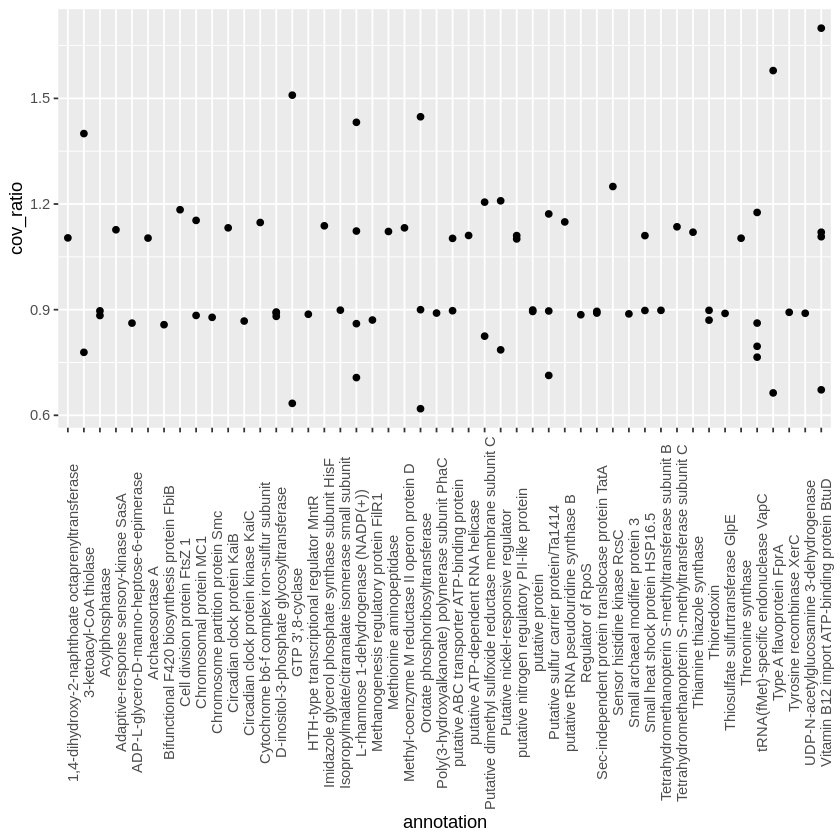

In [126]:
# Combine with dplyr creates too many columns
col_combined <- data.table(inner_join(filt_gene_cov, retn_gene_cov, by=c("annotation", "length")))
col_combined[, cov_ratio:=norm_cov.x / norm_cov.y]
# Plot spurios coverage ratios, but can't see how many gene copies are present
ggplot(data=col_combined[annotation %in% col_combined[, .N, by=annotation][N>1]$annotation 
                     & annotation != "hypothetical protein"
                     & (cov_ratio < 0.9 | cov_ratio > 1.1),]) +
  geom_point(aes(x=annotation, y=cov_ratio)) +
  theme(axis.text.x = element_text(angle = 90))

In [ ]:
#rbind and then find duplicate entried based on annotation and length. What if there is a exact gene copy in one MAG though?
combined <- data.table(rbind(filt_gene_cov[annotation %in% filt_gene_cov[, .N, by=annotation][N>1]$annotation], 
                             retn_gene_cov[annotation %in% retn_gene_cov[, .N, by=annotation][N>1]$annotation]))

#combined[, cov_ratio:=norm_cov.x / norm_cov.y]
# Get exact gene copies i.e. same gene in MAG twice. These genes are identical across MAGs
dups <- combined[annotation != "hypothetical protein", 
         .N, 
         by="annotation,length,sample"][N>1]

copies <- combined[combined[annotation != "hypothetical protein", 
                             .N, 
                             by="annotation,length"][N>1], ]

Duplicate column names found in molten data.table. Setting unique names using 'make.names'
Duplicate column names found in molten data.table. Setting unique names using 'make.names'


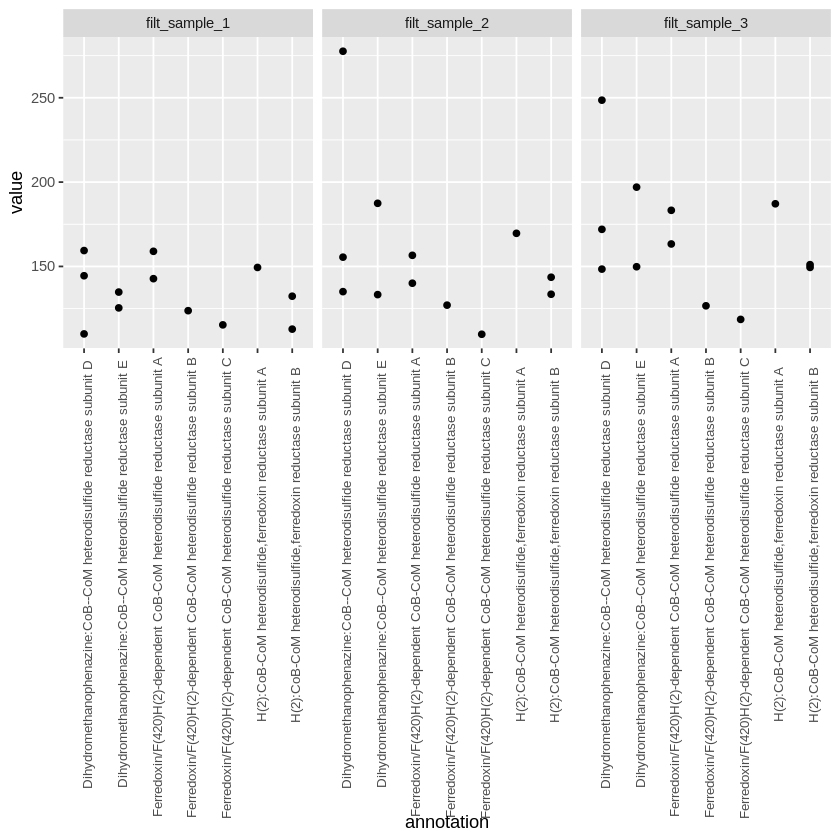

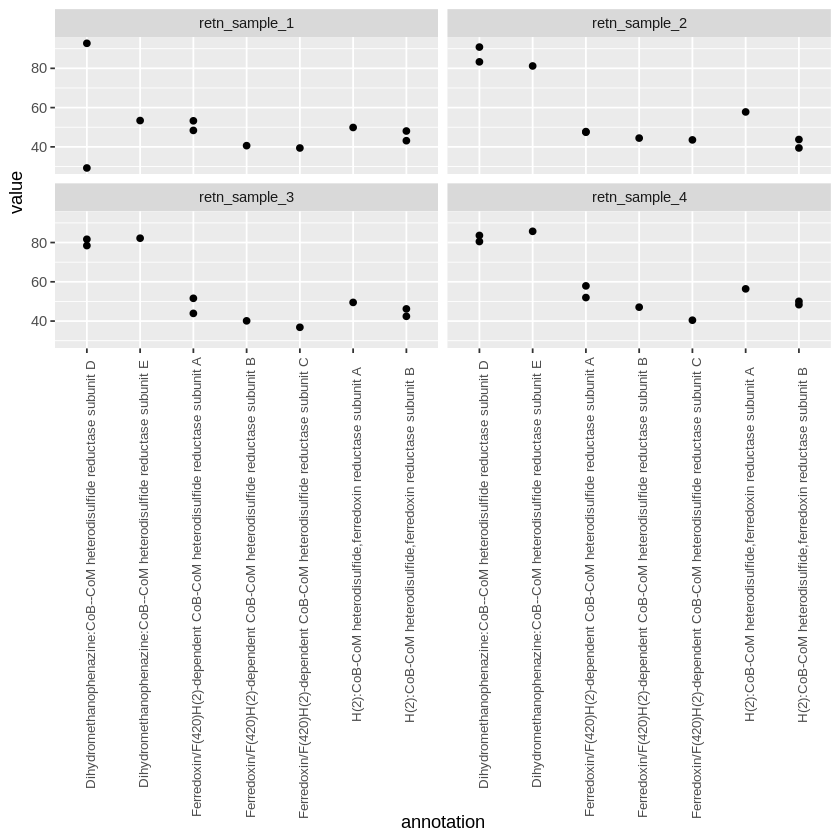

In [28]:
# filt_join[annotation %like% "heterodisulfide"]


ggplot(data = melt(filt_join[annotation %like% "heterodisulfide"], 
                   measure.vars=c("filt_sample_1", "filt_sample_2", "filt_sample_3"))) +
    geom_point(aes(x=annotation,y=value))+
    facet_wrap(~variable.1) +
      theme(axis.text.x = element_text(angle = 90, size=8, vjust=0.9, hjust=0.9))

ggplot(data = melt(retn_join[annotation %like% "heterodisulfide"], 
                   measure.vars=c("retn_sample_1", "retn_sample_2", "retn_sample_3", "retn_sample_4"))) +
    geom_point(aes(x=annotation,y=value))+
    facet_wrap(~variable.1) +
      theme(axis.text.x = element_text(angle = 90, size=8, vjust=0.9, hjust=0.9))



In [29]:
retn_join[annotation %like% "heterodisulfide"]
filt_join[annotation %like% "heterodisulfide"]
# retentate_nano[gene %like% 'hdr', ]
mean_retn
sd_retn

annotation                                                                 
1  H(2):CoB-CoM heterodisulfide,ferredoxin reductase subunit A                
2  H(2):CoB-CoM heterodisulfide,ferredoxin reductase subunit B                
3  Dihydromethanophenazine:CoB--CoM heterodisulfide reductase subunit E       
4  Dihydromethanophenazine:CoB--CoM heterodisulfide reductase subunit D       
5  Ferredoxin/F(420)H(2)-dependent CoB-CoM heterodisulfide reductase subunit A
6  H(2):CoB-CoM heterodisulfide,ferredoxin reductase subunit B                
7  Dihydromethanophenazine:CoB--CoM heterodisulfide reductase subunit D       
8  Ferredoxin/F(420)H(2)-dependent CoB-CoM heterodisulfide reductase subunit A
9  Ferredoxin/F(420)H(2)-dependent CoB-CoM heterodisulfide reductase subunit B
10 Ferredoxin/F(420)H(2)-dependent CoB-CoM heterodisulfide reductase subunit C
   length variable retn_sample_1 retn_sample_2 retn_sample_3 retn_sample_4
1  2024   mean_cov 49.87259      57.78864      49.50346      56.40593     
2   872   mean_cov 48.07560      39.43528      42.42669      50.05326     
3   818   mean_cov 53.39988      81.20147      82.21245      85.71734     
4  1424   mean_cov 92.74456      83.29965      78.44491      83.61263     
5  2372   mean_cov 48.37611      47.76591      43.90919      51.97788     
6   842   mean_cov 43.14116      43.74259      46.19870      48.34045     
7  1034   mean_cov 29.24444      90.82609      81.66812      80.51449     
8  2339   mean_cov 53.27222      47.45192      51.59423      57.92372     
9   890   mean_cov 40.61279      44.46184      40.11392      47.07351     
10  431   mean_cov 39.42130      43.54514      36.82755      40.43750

annotation                                                                 
1  Ferredoxin/F(420)H(2)-dependent CoB-CoM heterodisulfide reductase subunit A
2  Ferredoxin/F(420)H(2)-dependent CoB-CoM heterodisulfide reductase subunit B
3  Ferredoxin/F(420)H(2)-dependent CoB-CoM heterodisulfide reductase subunit C
4  H(2):CoB-CoM heterodisulfide,ferredoxin reductase subunit A                
5  H(2):CoB-CoM heterodisulfide,ferredoxin reductase subunit B                
6  Dihydromethanophenazine:CoB--CoM heterodisulfide reductase subunit E       
7  Dihydromethanophenazine:CoB--CoM heterodisulfide reductase subunit D       
8  Dihydromethanophenazine:CoB--CoM heterodisulfide reductase subunit E       
9  Dihydromethanophenazine:CoB--CoM heterodisulfide reductase subunit D       
10 Ferredoxin/F(420)H(2)-dependent CoB-CoM heterodisulfide reductase subunit A
11 H(2):CoB-CoM heterodisulfide,ferredoxin reductase subunit B                
12 Dihydromethanophenazine:CoB--CoM heterodisulfide reductase subunit D       
   length variable filt_sample_1 filt_sample_2 filt_sample_3
1  2339   mean_cov 158.9603      156.5814      183.2709     
2   890   mean_cov 123.7615      127.0426      126.6487     
3   431   mean_cov 115.3484      109.7743      118.5868     
4  2024   mean_cov 149.3891      169.6281      187.1420     
5   872   mean_cov 112.8184      133.5034      149.4181     
6   818   mean_cov 125.4127      133.2869      149.8144     
7  1349   mean_cov 144.4715      135.0504      148.4044     
8   821   mean_cov 134.7926      187.4234      197.0091     
9  1424   mean_cov 159.4088      155.4856      171.9937     
10 2372   mean_cov 142.7396      140.0405      163.3093     
11  842   mean_cov 132.3357      143.5902      151.0504     
12 1034   mean_cov 109.9836      277.6005      248.5787

ERROR: Error in eval(expr, envir, enclos): object 'mean_retn' not found


In [156]:
#~~~~~~~~~INDIVIDUAL SAMPLE ANALYSIS~~~~~~~~~~~~~~~~#
# add in mean coverages as well
per_sample_combined <- data.table(
    inner_join(
        filt_join[, 
        mean_filt:=(filt_sample_1 + filt_sample_2 + filt_sample_3)/3], 
        retn_join[, mean_retn:=(retn_sample_2 + retn_sample_3 + retn_sample_4)/3], 
        by=c("annotation", "length", "variable")
    )
)

per_sample_combined <- data.table(
    melt(
        per_sample_combined[annotation!="hypothetical protein"], 
        id.vars=c("annotation", "length", "variable", "mean_retn", "mean_filt"), 
        value.name="norm_cov", variable.name = "sample")
)

per_sample_combined[, fraction:=ifelse(grepl("filt", sample), "filtrate", "retentate")]
per_sample_combined[, cov_ratio:=mean_filt/mean_retn]

per_sample_combined

annotation                                                                 
1     Tyrosine recombinase XerC                                                  
2     Minichromosome maintenance protein MCM                                     
3     F(420)H(2) dehydrogenase subunit N                                         
4     F(420)H(2) dehydrogenase subunit M                                         
5     F(420)H(2) dehydrogenase subunit L                                         
6     F(420)H(2) dehydrogenase subunit K                                         
7     F(420)H(2) dehydrogenase subunit J                                         
8     F(420)H(2) dehydrogenase subunit I                                         
9     F(420)H(2) dehydrogenase subunit H                                         
10    F(420)H(2) dehydrogenase subunit D                                         
11    NADH-quinone oxidoreductase subunit C/D                                    
12    F(420)H(2) dehydrogenase subunit B                                         
13    F(420)H(2) dehydrogenase subunit A                                         
14    Dihydroorotate dehydrogenase                                               
15    ORC1-type DNA replication protein                                          
16    Glutamate-1-semialdehyde 2,1-aminomutase                                   
17    Porphobilinogen deaminase                                                  
18    S-adenosyl-L-methionine-dependent uroporphyrinogen III methyltransferase   
19    Adenosylcobinamide-GDP ribazoletransferase                                 
20    Adenosylcobinamide-phosphate guanylyltransferase                           
21    Inosine-5'-monophosphate dehydrogenase                                     
22    Inosine-5'-monophosphate dehydrogenase                                     
23    3-keto-L-gulonate-6-phosphate decarboxylase UlaD                           
24    Diadenylate cyclase                                                        
25    Diaminopimelate epimerase                                                  
26    ATP phosphoribosyltransferase                                              
27    Epoxyqueuosine reductase QueH                                              
28    Peptidyl-tRNA hydrolase                                                    
29    NAD(P)H-quinone oxidoreductase subunit I, chloroplastic                    
30    Ferredoxin/F(420)H(2)-dependent CoB-CoM heterodisulfide reductase subunit A
⋮     ⋮                                                                          
21692 Vitamin B12 import ATP-binding protein BtuD                                
21693 Vitamin B12 import ATP-binding protein BtuD                                
21694 Vitamin B12 import ATP-binding protein BtuD                                
21695 Vitamin B12 import ATP-binding protein BtuD                                
21696 Vitamin B12 import ATP-binding protein BtuD                                
21697 Vitamin B12 import ATP-binding protein BtuD                                
21698 Vitamin B12 import ATP-binding protein BtuD                                
21699 Vitamin B12 import ATP-binding protein BtuD                                
21700 Vitamin B12 import ATP-binding protein BtuD                                
21701 DNA-binding protein                                                        
21702 30S ribosomal protein S19e                                                 
21703 NADPH dehydrogenase                                                        
21704 Phosphoribosylamine--glycine ligase                                        
21705 30S ribosomal protein S17e                                                 
21706 4-hydroxy-tetrahydrodipicolinate synthase                                  
21707 4-hydroxy-tetrahydrodipicolinate reductase                                 
21708 1,4-dihydroxy-2-naphthoate octaprenyltransferase                

contig            type start   end     strand forward_average_coverage
1    contig_1266_pilon CDS     24    1196   +      132.73231               
2    contig_1266_pilon CDS   1246    1437   +       66.00521               
3    contig_1266_pilon CDS   1422    1910   +      147.73211               
4    contig_1266_pilon CDS   1905    2453   -      113.71585               
5    contig_1266_pilon CDS   2533    2811   -       68.11470               
6    contig_1560_pilon CDS     80     433   +      441.69774               
7    contig_1560_pilon CDS    440     895   +      429.93421               
8    contig_1560_pilon CDS    892    1059   +      439.00000               
9    contig_1560_pilon CDS   1056    1436   +      379.22572               
10   contig_1560_pilon CDS   1433    1627   +      316.82564               
11   contig_1560_pilon CDS   1673    1894   +      217.01351               
12   contig_1560_pilon CDS   1872    3155   +      221.27648               
13   contig_1560_pilon CDS   3136    3495   +      242.69167               
14   contig_1560_pilon CDS   3555    3710   +      401.75641               
15   contig_1560_pilon CDS   4384    4923   +      345.73519               
16   contig_1560_pilon CDS   4923    5030   +      413.49074               
17   contig_1560_pilon CDS   5032    6744   +      402.56451               
18   contig_1560_pilon CDS   6744    7193   +      261.19556               
19   contig_1560_pilon CDS   7174    7596   +      295.28369               
20   contig_1560_pilon CDS   7663    8304   +      349.58255               
21   contig_1560_pilon CDS   8308    8667   +      373.48611               
22   contig_1560_pilon CDS   8800   10299   +      341.97800               
23   contig_1560_pilon CDS  10296   10499   -      202.12745               
24   contig_1560_pilon CDS  10609   12063   +      334.36014               
25   contig_1560_pilon CDS  12063   13283   +      333.76331               
26   contig_1560_pilon CDS  13285   13980   +      231.30172               
27   contig_1560_pilon CDS  13977   14423   -      299.68904               
28   contig_1560_pilon CDS  14590   14751   +      238.96296               
29   contig_1560_pilon CDS  14751   14963   +      249.40376               
30   contig_1560_pilon CDS  14963   15085   +      294.19512               
⋮    ⋮                 ⋮    ⋮       ⋮       ⋮      ⋮                       
3595 contig_179_pilon  CDS  3281900 3282232 +       80.07507508            
3596 contig_179_pilon  CDS  3282522 3282851 +        0.19696970            
3597 contig_179_pilon  CDS  3284182 3284790 +       15.23645320            
3598 contig_179_pilon  CDS  3285321 3286526 -        0.41044776            
3599 contig_179_pilon  CDS  3287589 3288257 +        0.78325859            
3600 contig_179_pilon  CDS  3288254 3288727 +        1.47257384            
3601 contig_179_pilon  CDS  3288801 3289958 +        0.70379965            
3602 contig_179_pilon  CDS  3289854 3290987 -        0.82186949            
3603 contig_179_pilon  CDS  3291034 3291717 -        0.04532164            
3604 contig_179_pilon  CDS  3291772 3293148 -        1.75816993            
3605 contig_179_pilon  CDS  3293431 3293856 -        0.88262911            
3606 contig_179_pilon  CDS  3294594 3296336 -        1.04360298            
3607 contig_179_pilon  CDS  3296622 3296753 -        1.96212121            
3608 contig_179_pilon  CDS  3296750 3297079 -        0.11515152            
3609 contig_179_pilon  CDS  3297119 3297373 -        0.00000000            
3610 contig_179_pilon  CDS  3298629 3300293 +        2.05645646            
3611 contig_179_pilon  CDS  3300367 3300975 -        1.04433498            
3612 contig_179_pilon  CDS  3301443 3302867 -        1.07157895            
3613 contig_179_pilon  CDS  3304076 3305272 +        1.83876358            
3614 contig_179_pilon  CDS  3305340 3306284 +        2.47619048            
3615 contig_179_pilon  CDS  3306382 3307008 -        

In [162]:
retn_join[, mean_retn:=(retn_sample_2 + retn_sample_3 + retn_sample_4)/3]
retn_mean <- mean(per_sample_combined$mean_retn)
retn_sd <- sd(per_sample_combined$mean_retn)
retn_join[(mean_retn <= (retn_mean - retn_sd) | mean_retn >= (retn_mean + retn_sd)) & annotation %like% "subunit", ]
p0 <- ggplot(data = retn_join[mean_retn <= (retn_mean - retn_sd) | mean_retn >= (retn_mean + retn_sd), ]) +
  geom_point(aes(x=annotation, y=mean_retn))+
#   geom_point(aes(x=annotation, y=mean_filt, group=sample, color=fraction))+
  scale_colour_discrete()+
  theme(axis.text.x = element_text(angle = 90, size=8))

ggsave("retentate_abberrant_means.png", plot=p0, width=12, height=12)

annotation                                                              
1  Fumarate reductase (CoM/CoB) subunit B                                  
2  Imidazole glycerol phosphate synthase subunit HisF                      
3  GMP synthase [glutamine-hydrolyzing] subunit A                          
4  Poly(3-hydroxyalkanoate) polymerase subunit PhaC                        
5  Molybdenum-containing formylmethanofuran dehydrogenase 1 subunit C      
6  V-type ATP synthase subunit E                                           
7  Molybdenum-containing formylmethanofuran dehydrogenase 1 subunit C      
8  Dihydromethanophenazine:CoB--CoM heterodisulfide reductase subunit E    
9  Dihydromethanophenazine:CoB--CoM heterodisulfide reductase subunit D    
10 F(420)H(2) dehydrogenase subunit M                                      
11 Glutamyl-tRNA(Gln) amidotransferase subunit E                           
12 Tetrahydromethanopterin S-methyltransferase subunit H                   
13 Dihydromethanophenazine:CoB--CoM heterodisulfide reductase subunit D    
14 F(420)H(2) dehydrogenase subunit K                                      
15 F(420)H(2) dehydrogenase subunit H                                      
16 F(420)H(2) dehydrogenase subunit A                                      
17 Sulfhydrogenase 2 subunit gamma                                         
18 DNA-directed RNA polymerase subunit H                                   
19 DNA-directed RNA polymerase subunit A''                                 
20 DNA-directed RNA polymerase subunit A''                                 
21 Exodeoxyribonuclease 7 small subunit                                    
22 Exodeoxyribonuclease 7 large subunit                                    
23 Poly(3-hydroxyalkanoate) polymerase subunit PhaC                        
24 Putative dimethyl sulfoxide reductase iron-sulfur subunit B             
25 Tetrahydromethanopterin S-methyltransferase subunit F                   
26 Peptide chain release factor subunit 1                                  
27 Protein-methionine-sulfoxide reductase catalytic subunit MsrP           
28 Sulfhydrogenase 1 subunit alpha                                         
29 Sulfhydrogenase 2 subunit beta                                          
30 Translation initiation factor 2 subunit alpha                           
31 Protein-methionine-sulfoxide reductase catalytic subunit MsrP           
32 [Methyl-coenzyme M reductase subunit alpha]-arginine C-methyltransferase
33 KEOPS complex subunit Bud32                                             
   length variable retn_sample_1 retn_sample_2 retn_sample_3 retn_sample_4
1   719   mean_cov 38.45556       41.02361      32.09028      34.78958    
2   713   mean_cov 41.21639       36.97339      34.15896      38.34314    
3   563   mean_cov 46.14982       38.27571      32.77216      37.83333    
4  1037   mean_cov 35.29672      101.10116      73.99229      93.83044    
5   728   mean_cov 39.00960       73.63992      67.04390      69.35117    
6   551   mean_cov 22.82518       35.49638      32.82790      38.71739    
7   374   mean_cov 30.46800       75.07867      70.60800      82.65600    
8   818   mean_cov 53.39988       81.20147      82.21245      85.71734    
9  1424   mean_cov 92.74456       83.29965      78.44491      83.61263    
10 1454   mean_cov 38.87216       70.52852      68.47526      81.14467    
11 1892   mean_cov 36.26096       38.89250      35.81537      40.73032    
12  920   mean_cov 33.84419       39.79805      30.95494      33.16178    
13 1034   mean_cov 29.24444       90.82609      81.66812      80.51449    
14  302   mean_cov 36.66007       86.50825      77.60891      86.61716    
15 1112   mean_cov 46.82120       81.80818      70.08715      74.36568    
16  374   mean_cov 11.76667       27.96267      32.89333      36.41333    
17  746   mean_cov 43.11914       43.97925      32.56760      37.72691    
18  257   mean_cov 30.31008       23.41279      34.06589      29.3992

In [166]:
retn_mean
retn_sd

[1] 53.7984

[1] 15.23695

In [141]:
cv_mean <- mean(per_sample_combined$cov_ratio)
cv_sd <- sd(per_sample_combined$cov_ratio)

In [149]:
# Genes that were in each sample but also had multiple copies
#per_sample_combined[, .N, by=c("annotation", "length")][N==7][, .N, by=annotation][N>1]$annotation

# Plot out points with wack cov ratio based on mean coverages
p1 <- ggplot(data = per_sample_combined[cov_ratio <= (cv_mean - cv_sd) | cov_ratio >= (cv_mean + cv_sd), ]) +
  geom_point(aes(x=annotation, y=cov_ratio, group=sample, color=fraction))+
#   geom_point(aes(x=annotation, y=mean_filt, group=sample, color=fraction))+
  scale_colour_discrete()+
  theme(axis.text.x = element_text(angle = 90, size=8))+
  facet_wrap(~sample)

ggsave("coverage_ratio_all.png", plot=p1, width=40, height=12)

In [ ]:
# Plot out points with wack cov ratio based on mean coverages
ggplot(data = 
       per_sample_combined[(cov_ratio < 0.7 | cov_ratio > 1.3) & 
                           annotation %in% per_sample_combined[, .N, by=c("annotation", "length")][N==7][, .N, by=annotation][N>1]$annotation, ]) +
  geom_point(aes(x=annotation, y=norm_cov, group=sample, color=fraction))+
  scale_colour_discrete()+
  theme(axis.text.x = element_text(angle = 90))+
  facet_wrap(~sample)